### Hanson Session on Machine Learning - Linear Regression
by Mudit Dixit, CSIR-CLRI

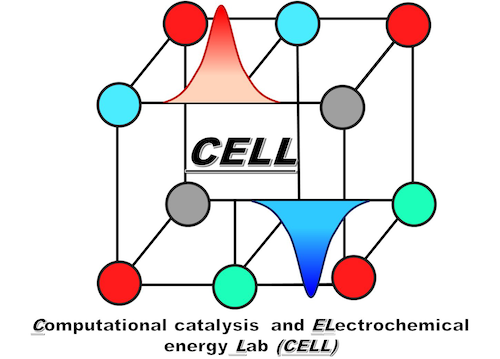

#### Import all important modules
- Pandas and Numpy 
- Scikit-learn Linear model
- Scikit-learn trin_test_split
- Scikit-learn mean squared error
- Scikit-learn cross validation
- Matplotlib and Seaborn for plotting the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

    Change the directory to hands-on directory

In [5]:
cd ML_handson/

/Users/geet/ML_handson


**Read the excel file containing data using the pandas reda_excel object**

In [63]:
df=pd.read_excel('O_ads_small.xlsx', index_col=False)

**Print the dataframe to see the data**

In [64]:
test = df['Binding_energy'].to_numpy()
test

array([-4.175, -3.98 , -4.188, -4.117, -4.004, -4.067, -4.161, -4.071,
       -4.166, -4.129, -3.966, -4.163, -4.07 , -4.091, -4.008, -4.132,
       -4.002, -4.197, -4.072, -3.792, -3.757, -3.664, -3.709, -3.733,
       -3.902, -3.901, -3.653, -3.761, -3.79 , -3.87 , -3.839, -3.658,
       -3.566, -3.735, -3.598, -3.743, -3.741, -3.485, -3.733, -3.768,
       -3.848, -3.834, -3.536, -3.967, -3.907, -4.139, -3.945, -4.084,
       -3.812, -4.058, -3.97 , -4.082, -4.043, -3.951, -3.939, -4.031,
       -3.738, -3.727, -3.814, -3.682, -3.708, -3.612, -3.827, -3.665,
       -3.851, -3.855, -3.648, -3.503, -3.361, -3.532, -3.365, -3.62 ,
       -3.452, -3.591, -3.811, -3.603, -3.529, -3.543])

In [65]:
df

,Binding_energy,CN,GCN,GCN-Pt-Pt,GCN-Pt-M,GCN-M-Pt,GCN-M-M,d-Band_Center
0,-4.175,7.333,4.591,2.864,1.182,0.409,0.136,-2.540
1,-3.980,7.333,4.591,2.273,0.682,0.864,0.773,-2.611
2,-4.188,7.333,4.591,3.409,1.182,0.000,0.000,-2.512
3,-4.117,7.333,4.591,3.227,0.818,0.364,0.182,-2.527
4,-4.004,7.333,4.591,2.227,0.727,0.864,0.773,-2.622
...,...,...,...,...,...,...,...,...
73,-3.591,9.000,6.955,4.136,1.182,1.091,0.545,-2.741
74,-3.811,9.000,6.955,4.955,1.455,0.273,0.273,-2.637
75,-3.603,9.000,6.955,4.182,1.136,0.818,0.818,-2.746
76,-3.529,9.000,6.955,3.682,1.091,1.364,0.818,-2.753


    Plot the data using matplotlib

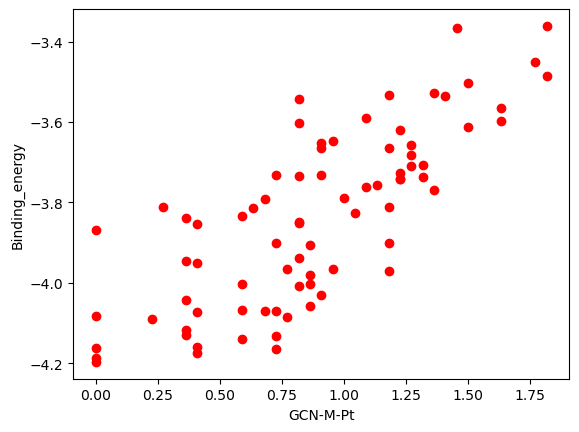

In [72]:
plt.ylabel('Binding_energy')
plt.xlabel('GCN-M-Pt')
plt.scatter(df['GCN-M-Pt'], df['Binding_energy'], color='red')


On visual inspection it appears that we can use Linear Regression model.
Regression Model:
- A regression model is a type of Machine Learning used for predicting a continuous outcome variable (also called the dependent variable) based on one or more predictor variables (independent variables). The goal is to find the relationship between the input variables and the output variable.
$$y=w_1x_1+w_2x_2+...w_nx_n+b$$
where $w_n$ are weights associated with input features $x_n$ and $b$ is the bais (intercept).


**define input feature matrix as X**

In [73]:
X=df[['Binding_energy']]
X

,Binding_energy
0,-4.175
1,-3.980
2,-4.188
3,-4.117
4,-4.004
...,...
73,-3.591
74,-3.811
75,-3.603
76,-3.529


**Define target variable y**

In [74]:
y=df['GCN-M-Pt']
y

0     0.409
1     0.864
2     0.000
3     0.364
4     0.864
      ...  
73    1.091
74    0.273
75    0.818
76    1.364
77    0.818
Name: GCN-M-Pt, Length: 78, dtype: float64

We can use Scikit-learn's train_test_split function to randomly split a dataset into two parts as a training set and a testing set. The training set is used to train the machine learning model, and the testing set is used to evaluate the model's performance on data it hasn't seen before.

- X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
- X_train = training set of features  
- X_test = test set of features 
- y_train = training set traget variables 
- y_test = test set of features 
- Test size 0.2 == 20% data 

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Now we print to see what are the contents of 

In [76]:
X_train

,Binding_energy
2,-4.188
10,-3.966
67,-3.503
12,-4.070
73,-3.591
...,...
61,-3.612
36,-3.741
62,-3.827
23,-3.733


In [77]:
model = LinearRegression()

In [78]:
model.fit(X_train, y_train)

LinearRegression()

In [79]:
y_predict=model.predict(X_test)

In [80]:
y_predict

array([0.48470503, 0.95072693, 0.87955268, 0.4558964 , 1.67433185,
       1.68111035, 0.7660128 , 1.24220245, 1.37268858, 1.16763895,
       0.76431817, 0.64908366, 0.26440376, 0.49995665, 1.38455096,
       1.06087756])

In [81]:
y_test

5     0.591
19    0.682
41    0.591
47    0.773
70    1.455
68    1.818
25    1.182
71    1.227
77    0.818
21    1.182
24    0.727
50    1.182
17    0.000
49    0.864
42    1.409
57    1.227
Name: GCN-M-Pt, dtype: float64

In [121]:
mse=mean_squared_error(y_test, y_predict)
mse

0.08321008072382435

In [122]:
R2=r2_score(y_test,y_predict)
R2

0.5336084594755168

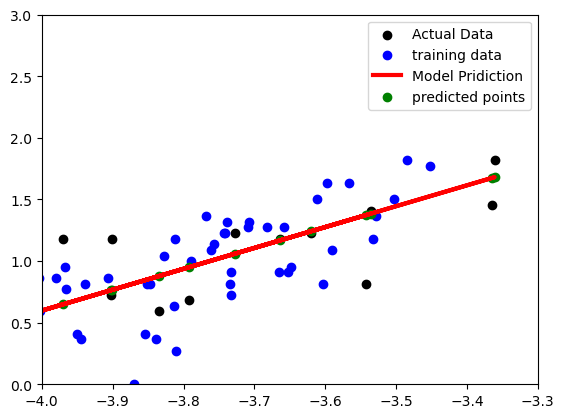

In [92]:
plt.scatter(X_test, y_test, color='black', label ='Actual Data')
plt.scatter(X_train, y_train, color='blue', label='training data')
plt.plot(X_test, y_predict, color='red', linewidth=3,label='Model Pridiction')
plt.scatter (X_test, y_predict, color='green',label="predicted points" )
plt.ylim(0,3)
plt.xlim(-4,-3.3)
plt.legend()

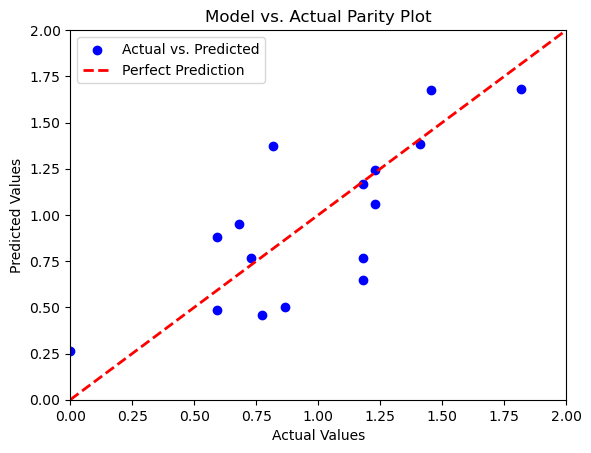

In [93]:

plt.scatter(y_test, y_predict, color='blue', label='Actual vs. Predicted')

# Add a reference line (y=x line)
plt.plot([0,2], [0, 2], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model vs. Actual Parity Plot')
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend()

In [94]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f'Cross-validated Mean Squared Error: {cv_mse}')

Cross-validated Mean Squared Error: 0.09234267930992732


**Multiparameter regression**

In [115]:
df

,Binding_energy,CN,GCN,GCN-Pt-Pt,GCN-Pt-M,GCN-M-Pt,GCN-M-M,d-Band_Center
0,-4.175,7.333,4.591,2.864,1.182,0.409,0.136,-2.540
1,-3.980,7.333,4.591,2.273,0.682,0.864,0.773,-2.611
2,-4.188,7.333,4.591,3.409,1.182,0.000,0.000,-2.512
3,-4.117,7.333,4.591,3.227,0.818,0.364,0.182,-2.527
4,-4.004,7.333,4.591,2.227,0.727,0.864,0.773,-2.622
...,...,...,...,...,...,...,...,...
73,-3.591,9.000,6.955,4.136,1.182,1.091,0.545,-2.741
74,-3.811,9.000,6.955,4.955,1.455,0.273,0.273,-2.637
75,-3.603,9.000,6.955,4.182,1.136,0.818,0.818,-2.746
76,-3.529,9.000,6.955,3.682,1.091,1.364,0.818,-2.753


In [118]:
X=df[['GCN','GCN-M-Pt','GCN-Pt-M','GCN-M-M','d-Band_Center','CN']]
X

,GCN,GCN-M-Pt,GCN-Pt-M,GCN-M-M,d-Band_Center,CN
0,4.591,0.409,1.182,0.136,-2.540,7.333
1,4.591,0.864,0.682,0.773,-2.611,7.333
2,4.591,0.000,1.182,0.000,-2.512,7.333
3,4.591,0.364,0.818,0.182,-2.527,7.333
4,4.591,0.864,0.727,0.773,-2.622,7.333
...,...,...,...,...,...,...
73,6.955,1.091,1.182,0.545,-2.741,9.000
74,6.955,0.273,1.455,0.273,-2.637,9.000
75,6.955,0.818,1.136,0.818,-2.746,9.000
76,6.955,1.364,1.091,0.818,-2.753,9.000


In [120]:
y=df['Binding_energy']
y

0    -4.175
1    -3.980
2    -4.188
3    -4.117
4    -4.004
      ...  
73   -3.591
74   -3.811
75   -3.603
76   -3.529
77   -3.543
Name: Binding_energy, Length: 78, dtype: float64

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [126]:
model=LinearRegression()

In [161]:
model.fit(X_train,y_train)

LinearRegression()

In [162]:
y_predict=model.predict(X_test)
y_test

10   -3.966
45   -4.139
53   -3.951
44   -3.907
20   -3.757
13   -4.091
59   -3.682
24   -3.902
22   -3.709
42   -3.536
8    -4.166
64   -3.851
18   -4.072
74   -3.811
3    -4.117
36   -3.741
Name: Binding_energy, dtype: float64

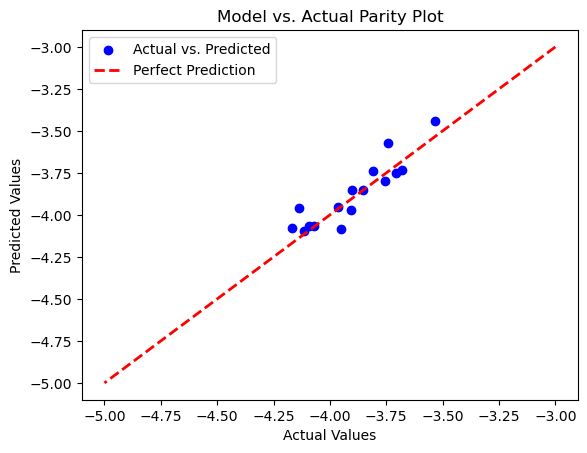

In [163]:

plt.scatter(y_test, y_predict, color='blue', label='Actual vs. Predicted')
# Add a reference line (y=x line)
plt.plot([-3,-5], [-3, -5], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model vs. Actual Parity Plot')
plt.legend()

In [164]:
mse = mean_squared_error(y_test, y_predict)
mse

0.007195127703911067

In [165]:
model.coef_

array([ 0.19625682, -0.02502625, -0.27788783,  0.05272003, -0.72272115,
       -0.01015261])

In [166]:
model.intercept_

-6.5214587183526245

**Is this model really good or it is overfitting?**



In [168]:
model.score(X_test,y_test)

0.7788639543548554

In [167]:
model.score(X_train,y_train)

0.9309463449093526

**Check with L1 regularization** - **LASSO Regression**

LASSO (Least Absolute Shrinkage and Selection Operator) Regression is a linear regression technique that incorporates L1 regularization. Regularization methods are used to prevent overfitting in statistical models by adding a penalty term to the loss function, which discourages overly complex models with large coefficients. In the case of LASSO Regression, the penalty term is based on the absolute values of the regression coefficients.

In [237]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.01,max_iter=10000, tol=0.00001)

lasso.fit(X_train,y_train)


Lasso(alpha=0.01, max_iter=10000, tol=1e-05)

In [250]:
lasso.score(X_test,y_test)

0.7869307004292017

In [239]:
lasso.score(X_train,y_train)

0.8883769676299385

In [240]:
y_predict=lasso.predict(X_test)

In [241]:
mse = mean_squared_error(y_test, y_predict)
mse

0.006932659104589711

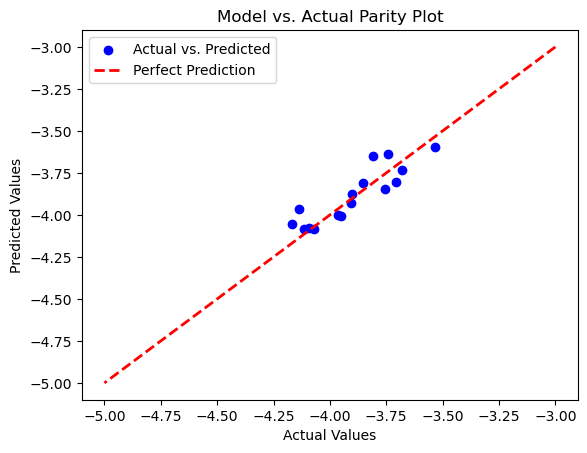

In [242]:
plt.scatter(y_test, y_predict, color='blue', label='Actual vs. Predicted')
# Add a reference line (y=x line)
plt.plot([-3,-5], [-3, -5], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model vs. Actual Parity Plot')
plt.legend()

In [243]:
lasso.coef_

array([ 0.15806878,  0.04091636, -0.        ,  0.09403076, -0.        ,
        0.03201925])

**Can we reduce overfitting with L2 Regularization?:** **-Ridge Regression**
L2 regularization, also known as Ridge regularization, is a technique used in linear regression and other linear models to prevent overfitting and improve the stability of the model. It adds a penalty term to the standard linear regression objective function, encouraging the model to keep the coefficients small.



In [299]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=30,max_iter=1000, tol=0.001)


In [301]:
ridge.fit(X_train, y_train)

Ridge(alpha=30, max_iter=1000, tol=0.001)

In [302]:
ridge.score(X_test,y_test)

0.756114886132368

In [298]:
ridge.score(X_train,y_train)

0.859246852231361

In [290]:
ridge.coef_

array([ 0.08898432,  0.05007592, -0.00682539,  0.04522551, -0.01172395,
        0.07126838])

**Lets Check with k-fold cross validation**

In [303]:
from sklearn.model_selection import KFold

In [337]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
mse_scores = []

In [346]:
mse_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')

mse_scores = mse_scores

average_mse = np.mean(mse_scores)
average_mse
#mse_scores

0.7640193942688507

In [347]:
mse_scores = cross_val_score(ridge, X_test, y_test, cv=5, scoring='r2')

mse_scores = mse_scores

average_mse = np.mean(mse_scores)
#average_mse
mse_scores

array([-0.69149294,  0.26853493, -1.24626988, -0.53068151,  0.57894257])

In [345]:
mse_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')

mse_scores = mse_scores

average_mse = np.mean(mse_scores)
average_mse
#mse_scores

-0.16061672561237422

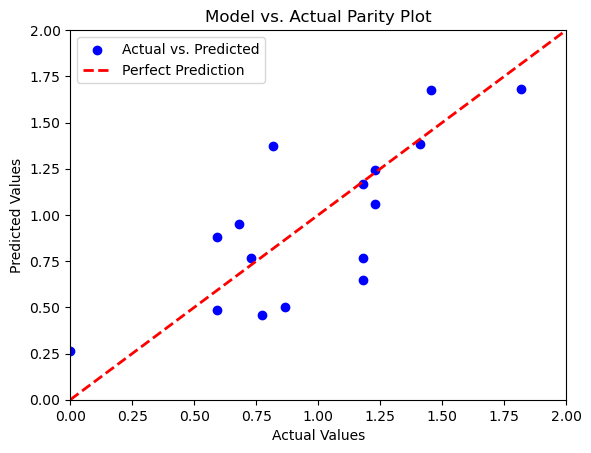

In [101]:

plt.scatter(y_test, y_predict, color='blue', label='Actual vs. Predicted')


# Add a reference line (y=x line)
plt.plot([0,2], [0, 2], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model vs. Actual Parity Plot')
plt.xlim(0,2)
plt.ylim(0,2)
plt.legend()

In [90]:
df=pd.read_excel("Al2O3_SAC.xlsx")
df

,Elements,Experimental Bulk Cohesive Energy/eV,Surface Energy/J/m^2,Experimental Ionization Potential/eV,Experimental Electron Affinity/eV,Band Gap of Oxides Surfaces/eV,Number of Bonds M-Mg (Final),Number of Bonds M-Al (Final),Number of Bonds M-O (Final),Number of Bonds M-Mg+M-Al+M-O (Final),M-O Binding Energy/eV,Average Adsorption Energy/eV
0,Au-Al2O3 (100) A,-3.81,0.490697,9.22553,2.309167,2.449223,0,1,1,2,-2.964901,-0.8433
1,Au-Al2O3 (100) B,-3.81,0.490697,9.22553,2.309167,2.449223,0,1,1,2,-2.964901,-0.8430
2,Au-Al2O3 (100) C,-3.81,0.490697,9.22553,2.309167,2.449223,0,1,1,2,-2.964901,-0.8441
3,Au-Al2O3 (100) D,-3.81,0.490697,9.22553,2.309167,2.449223,0,1,1,2,-2.964901,-0.7776
4,Au-Al2O3 (110) A,-3.81,1.486529,9.22553,2.309167,1.312146,0,2,0,2,-2.964901,-0.9150
...,...,...,...,...,...,...,...,...,...,...,...,...
99,Ir-Al2O3 (110) E,-6.94,1.486529,8.96702,1.565010,1.312146,0,3,2,5,-6.549855,-3.1893
100,Ir-Al2O3 (111) A,-6.94,1.681990,8.96702,1.565010,0.000000,0,3,3,6,-6.549855,-6.0164
101,Ir-Al2O3 (111) B,-6.94,1.681990,8.96702,1.565010,0.000000,0,3,3,6,-6.549855,-6.1389
102,Ir-Al2O3 (111) C,-6.94,1.681990,8.96702,1.565010,0.000000,0,2,3,5,-6.549855,-5.7072


In [92]:
main_df=df[['Average Adsorption Energy/eV', 'M-O Binding Energy/eV',"Band Gap of Oxides Surfaces/eV", 'Experimental Bulk Cohesive Energy/eV' ]]
main_df

,Average Adsorption Energy/eV,M-O Binding Energy/eV,Band Gap of Oxides Surfaces/eV,Experimental Bulk Cohesive Energy/eV
0,-0.8433,-2.964901,2.449223,-3.81
1,-0.8430,-2.964901,2.449223,-3.81
2,-0.8441,-2.964901,2.449223,-3.81
3,-0.7776,-2.964901,2.449223,-3.81
4,-0.9150,-2.964901,1.312146,-3.81
...,...,...,...,...
99,-3.1893,-6.549855,1.312146,-6.94
100,-6.0164,-6.549855,0.000000,-6.94
101,-6.1389,-6.549855,0.000000,-6.94
102,-5.7072,-6.549855,0.000000,-6.94


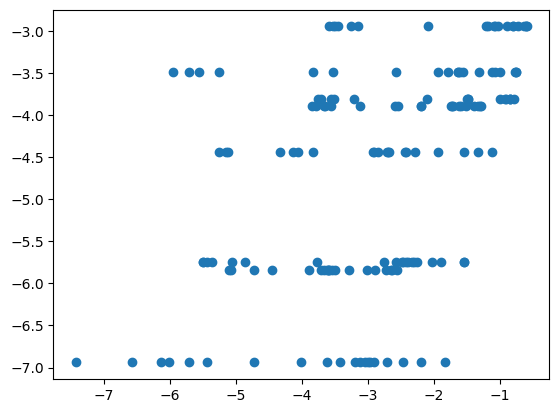

In [46]:
plt.scatter(df[['Average Adsorption Energy']], df[['Experimental Bulk Cohesive Energy/eV']])

Saving the trained model

In [47]:
import pickle

In [49]:
model.predict(X_train)

array([5.82636294, 5.78095715, 5.76897507, 5.77370484])

In [50]:
X_train

,Adsoroption Energy
5,-5.42
2,-6.86
1,-7.24
0,-7.09


In [96]:
with open ('model_LR', 'wb') as f:
    pickle.dump(model,f)
with open ('model_LR', 'rb') as f:
    LR=pickle.load(f)

In [56]:
LR.predict(X_test)

array([5.83456121, 5.85757943])